In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'../train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
removing_cols = ['User_ID','Product_ID']
cate_vars = ['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']

In [5]:
df['Product_Category_2'].fillna(0,inplace=True)
print(df['Product_Category_2'].isnull().sum())

0


In [6]:
print(df['Product_Category_3'].isnull().sum())
df['Product_Category_3'].fillna(0,inplace=True)
print(df['Product_Category_3'].isnull().sum())

383247
0


In [7]:
print(df['Product_Category_1'].value_counts())
print(df['Product_Category_1'].isnull().sum())

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64
0


In [8]:
print(df['Marital_Status'].value_counts())
print(df['Marital_Status'].isnull().sum())

0    324731
1    225337
Name: Marital_Status, dtype: int64
0


In [9]:
print(df['Stay_In_Current_City_Years'].value_counts())
print(df['Stay_In_Current_City_Years'].isnull().sum())

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
0


In [10]:
print(df['City_Category'].value_counts())
print(df['City_Category'].isnull().sum())

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
0


In [11]:
df['Gender'].isnull().sum()

0

In [12]:
print(df['Age'].value_counts())
print(df['Age'].isnull().sum())

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
0


In [13]:
#occupation
print(df['Occupation'].value_counts())
print(df['Occupation'].isnull().sum())

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64
0


In [14]:
df.shape

(550068, 12)

In [15]:
#No use of User_ID and Product_ID
df.drop(removing_cols,axis=1,inplace=True)

In [16]:
df['Age'] = df['Age'].map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [17]:
df2 = df.copy()
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0,10,A,2,0,3,0.0,0.0,8370
1,F,0,10,A,2,0,1,6.0,14.0,15200
2,F,0,10,A,2,0,12,0.0,0.0,1422
3,F,0,10,A,2,0,12,14.0,0.0,1057
4,M,6,16,C,4+,0,8,0.0,0.0,7969


In [18]:
for i in cate_vars:
    df[i] = df[i].astype('category')
    df = pd.concat([df.drop(i,axis=1),pd.get_dummies(df[i].astype('category'),prefix=i)],axis=1)

In [19]:
df.head()

,Purchase,Gender_F,Gender_M,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
0,8370,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15200,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1422,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1057,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7969,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.linear_model import LinearRegression as lr

In [21]:
from sklearn.model_selection import train_test_split as tts

In [22]:
X,y = df.drop('Purchase',1),df['Purchase']
X_train,X_test,y_train,y_test = tts(X,y)

In [23]:
LR = lr()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
LR.score(X_test,y_test)

0.650897009904174

In [25]:
df2['Stay_In_Current_City_Years'] = df2['Stay_In_Current_City_Years'].astype('category')

In [26]:
df2 = df2.drop('Stay_In_Current_City_Years',axis=1)

In [27]:
#pre-processing df2
df2.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0,10,A,0,3,0.0,0.0,8370
1,F,0,10,A,0,1,6.0,14.0,15200
2,F,0,10,A,0,12,0.0,0.0,1422
3,F,0,10,A,0,12,14.0,0.0,1057
4,M,6,16,C,0,8,0.0,0.0,7969


                  Purchase
City_Category             
A              8911.939216
B              9151.300563
C              9719.920993


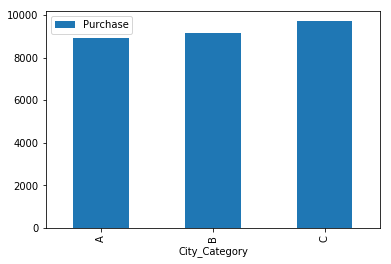

In [28]:
print(df2[['City_Category','Purchase']].groupby('City_Category').mean())
df2[['City_Category','Purchase']].groupby('City_Category').mean().plot(kind='bar')

                        Purchase
Product_Category_1              
1                   13606.218596
2                   11251.935384
3                   10096.705734
4                    2329.659491
5                    6240.088178
6                   15838.478550
7                   16365.689600
8                    7498.958078
9                   15537.375610
10                  19675.570927
11                   4685.268456
12                   1350.859894
13                    722.400613
14                  13141.625739
15                  14780.451828
16                  14766.037037
17                  10170.759516
18                   2972.864320
19                     37.041797
20                    370.481176


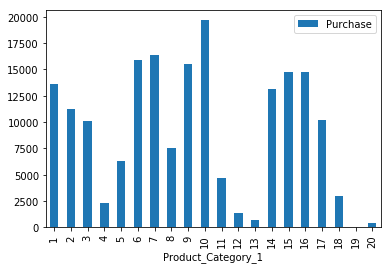

In [29]:
print(df2[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean())
df2[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean().plot(kind='bar')

               Purchase
Occupation             
0           9124.428588
1           8953.193270
2           8952.481683
3           9178.593088
4           9213.980251
5           9333.149298
6           9256.535691
7           9425.728223
8           9532.592497
9           8637.743761
10          8959.355375
11          9213.845848
12          9796.640239
13          9306.351061
14          9500.702772
15          9778.891163
16          9394.464349
17          9821.478236
18          9169.655844
19          8710.627231
20          8836.494905


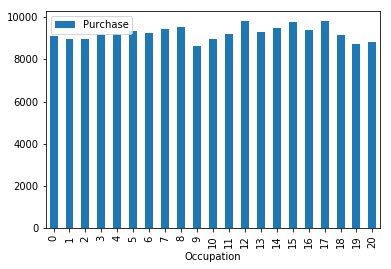

In [30]:
print(df2[['Occupation','Purchase']].groupby('Occupation').mean())
df2[['Occupation','Purchase']].groupby('Occupation').mean().plot(kind='bar')

In [31]:
df2.dtypes

Gender                 object
Age                     int64
Occupation              int64
City_Category          object
Marital_Status          int64
Product_Category_1      int64
Product_Category_2    float64
Product_Category_3    float64
Purchase                int64
dtype: object

In [32]:
df2['Gender'] = df2['Gender'].map({'F':1,'M':2})
df2['Occupation'].dtype
df2['City_Category'].value_counts()
df2['City_Category'] = df2['City_Category'].map({'A':1,'B':2,'C':3})

In [33]:
X2,y2 = df2.drop('Purchase',1),df2['Purchase']

In [34]:
for i in X2.columns:
    X2 = pd.concat([X2.drop(i,axis=1),pd.get_dummies(X2[i].astype('category'),prefix=i)],axis=1)

In [35]:
X2_train,X2_test,y2_train,y2_test = tts(X2,y2)

In [105]:
LR = lr(normalize=True,fit_intercept=False)
LR.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=True)

In [107]:
y_pred = LR.predict(X2_test)

In [94]:
from sklearn.metrics import mean_squared_error as mse

In [108]:
mse(y2_test,y_pred)**(1/2)

2970.7892064665884

In [109]:
LR.score(X2_test,y2_test)

0.6498279782619945

In [41]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [42]:
dtr = DTR()

In [43]:
from sklearn.model_selection import GridSearchCV as gsv

In [44]:
param_grid={'max_depth':range(4,10),'min_samples_leaf':np.linspace(0.1,0.5,20)}

In [45]:
dtr_cv = gsv(dtr,param_grid=param_grid,cv=5)

In [46]:
X2_train.head()

,Gender_1,Gender_2,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Occupation_0,...,Product_Category_3_9.0,Product_Category_3_10.0,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0
96667,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362241,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9372,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32214,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
342209,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dtr.fit(X2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [48]:
y_pred = dtr.predict(X2_test)

In [49]:
mse(y2_test,y_pred)**(1/2)

3178.557434665514

In [50]:
from sklearn.linear_model import Ridge,Lasso

In [51]:
r = Ridge()

In [52]:
params_lin = {'alpha':np.linspace(0.4,1,20)}

In [53]:
r_cv = gsv(r,param_grid=params_lin,cv=5)

In [54]:
r_cv.fit(X2_train,y2_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.4    , 0.43158, 0.46316, 0.49474, 0.52632, 0.55789, 0.58947,
       0.62105, 0.65263, 0.68421, 0.71579, 0.74737, 0.77895, 0.81053,
       0.84211, 0.87368, 0.90526, 0.93684, 0.96842, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [55]:
r_cv.best_score_

0.6470084999817153

In [56]:
import tensorflow.keras as k

In [100]:
model = k.models.Sequential([k.layers.Dense(128,input_dim=89,kernel_initializer='normal',activation='relu'),
                            k.layers.Dense(256,activation='relu',kernel_initializer='normal'),
                            k.layers.Dense(256,activation='relu',kernel_initializer='normal'),
                             k.layers.Dense(128,activation='relu',kernel_initializer='normal'),
                            k.layers.Dense(1,activation='linear',kernel_initializer='normal')])

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 128)               11520     
_________________________________________________________________
dense_30 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_31 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 129       
Total params: 143,361
Trainable params: 143,361
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])

In [106]:
8329019 ** (1/2)

2886.003984751234

In [110]:
model.fit(X2_train,y2_train,epochs=40,batch_size=512,validation_split=0.2)

Train on 330040 samples, validate on 82511 samples
Epoch 1/40
330040/330040 [==============================] - 6s 18us/sample - loss: 8374075.0549 - mean_squared_error: 8374069.5000 - val_loss: 8424243.6479 - val_mean_squared_error: 8424242.0000
Epoch 2/40
330040/330040 [==============================] - 6s 18us/sample - loss: 8340357.7539 - mean_squared_error: 8340357.0000 - val_loss: 8422711.1213 - val_mean_squared_error: 8422712.0000
Epoch 3/40
330040/330040 [==============================] - 6s 18us/sample - loss: 8335204.6205 - mean_squared_error: 8335206.0000 - val_loss: 8419011.3930 - val_mean_squared_error: 8419009.0000
Epoch 4/40
330040/330040 [==============================] - 6s 18us/sample - loss: 8319391.3081 - mean_squared_error: 8319389.0000 - val_loss: 8410340.1562 - val_mean_squared_error: 8410338.0000
Epoch 5/40
330040/330040 [==============================] - 6s 18us/sample - loss: 8311361.7459 - mean_squared_error: 8311359.0000 - val_loss: 8540790.9198 - val_mean_sq

In [111]:
y2_pred = model.predict(X2_test)

In [112]:
model.evaluate(X2_test,y2_test)

137517/137517 [==============================] - 14s 99us/sample - loss: 8465889.1091 - mean_squared_error: 8465891.0000


[8465889.109102875, 8465891.0]

In [114]:
mse(y2_test,y2_pred) ** (1/2)

2909.6200965486523